<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Fruit_Image_multi_class_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-08-13 00:16:30--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.1s    

2025-08-13 00:16:38 (16.4 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
img_height,img_width=32,32
batch_size=20

train_data=tf.keras.preprocessing.image_dataset_from_directory(
    'fruits/train',
    image_size=(img_height,img_width),
    batch_size=batch_size
)


val_data=tf.keras.utils.image_dataset_from_directory(
    'fruits/validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)


test_data=tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height,img_width),
    batch_size=batch_size
)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


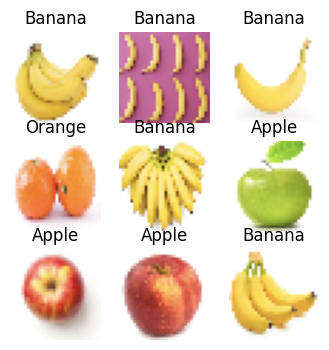

In [ ]:
class_names=["Apple","Banana","Orange"]



plt.figure(figsize=(4,4))
for images,labels in train_data.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(3)
])

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [ ]:
model.fit(train_data,validation_data=val_data,epochs=15)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.4559 - loss: 1.0534 - val_accuracy: 0.6061 - val_loss: 0.8792
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7245 - loss: 0.6877 - val_accuracy: 0.8636 - val_loss: 0.3978
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7457 - loss: 0.4850 - val_accuracy: 0.9545 - val_loss: 0.2051
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8805 - loss: 0.3014 - val_accuracy: 0.9394 - val_loss: 0.1939
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9238 - loss: 0.2128 - val_accuracy: 0.9394 - val_loss: 0.1488
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9364 - loss: 0.1997 - val_accuracy: 0.6970 - val_loss: 1.2176
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9224 - loss: 0.2602 - val_accuracy: 0.7121 - val_loss: 0.9494
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9157 - loss: 0.2366 - val_accuracy: 0.939

In [ ]:
model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9806 - loss: 0.0739


[0.10139773786067963, 0.9769230484962463]

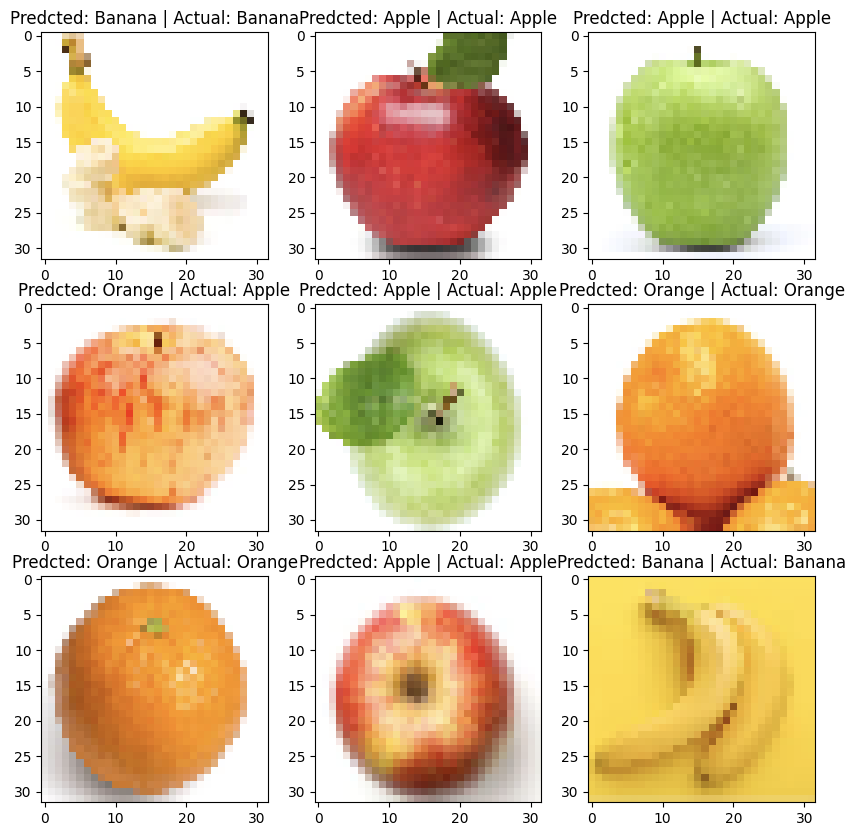

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_data.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predcted: " + class_names[index] + " | Actual: " + class_names[labels[i]])

In [ ]:
# saving the mode using tensorflow lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpm4gu0d3v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137269709395088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709396816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709396432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709395664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709398160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709399696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709395280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709394704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269728440784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137269709400848: TensorSpec(shape=(), dtype=tf.resource, name=None)
